In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv("df_final.csv")

df = df.drop(['Unnamed: 0', 'Hotel_Address', 'Travel_Type', 'Value_Counts_Percent'], axis = 1)
df

,Average_Score,Hotel_Name,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Traveller_Category,Room_Type,Stay_Length,Submitted_From_Mobile,Review,Review_Clean,tfidf_score,Reviewer_Score_Cat
0,7.70,Hotel Arena,Australia,42,1403,21,9,0.61,Family with young children,2 rooms,2,0,Rooms are nice but for elderly a bit difficul...,room nice elderly bit difficult room two story...,11.29,passive
1,7.70,Hotel Arena,Canada,35,1403,15,1,0.84,Family with young children,2 rooms,3,1,The staff in the restaurant could of been mor...,staff restaurant could pleasant visit stop boo...,4.83,promoter
2,7.70,Hotel Arena,United Kingdom,38,1403,14,8,0.51,Family with young children,2 rooms,2,1,Very steep steps in room up to the bed not sa...,steep step room bed safe child ask move room p...,10.85,detractor
3,7.70,Hotel Arena,Germany,364,1403,37,21,0.39,Family with young children,Classic Double Room,3,1,Sadly I cannot say that the rooms are clean e...,sadly cannot say room clean enough get room im...,55.88,detractor
4,7.70,Hotel Arena,Netherlands,4,1403,40,1,0.56,Family with young children,2 rooms,3,0,Please see above The hotel is going through r...,please see hotel go renovation unfortunately m...,6.54,detractor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38863,8.30,Lancaster London,United Arab Emirates,2,1463,15,7,0.67,Family with older children,Standard Double Room,2,1,Non Overall very good compared to othr hotel ...,non overall good compare othr hotel london spe...,3.23,passive
38864,8.30,Lancaster London,United Kingdom,8,1463,4,7,0.23,Family with older children,Standard Twin Room,3,0,Rude staff uncomfortable beds smelly rooms O...,rude staff uncomfortable bed smelly room location,2.05,detractor
38865,8.30,Lancaster London,United Arab Emirates,0,1463,5,1,0.72,Family with older children,2 rooms,2,0,The place is clean,place clean,0.95,passive
38866,8.50,Hotel Daniel Vienna,Switzerland,283,1405,25,2,0.56,Family with older children,Standard Twin Room,2,1,this is a cool hotel for people who appreciat...,cool hotel people appreciate design comfortabl...,52.46,detractor


In [3]:
a = df.columns.tolist()
cols_new = ['Reviewer_Score', 'Average_Score', 'Stay_Length', 'Total_Number_of_Reviews', 'Hotel_Name', 'Reviewer_Nationality', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Traveller_Category', 'Room_Type', 'Submitted_From_Mobile']

df = df[cols_new]
df.Submitted_From_Mobile = df.Submitted_From_Mobile.astype(int)
df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Reviewer_Score,Average_Score,Stay_Length,Total_Number_of_Reviews,Hotel_Name,Reviewer_Nationality,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Traveller_Category,Room_Type,Submitted_From_Mobile
0,0.61,7.70,2,1403,Hotel Arena,Australia,42,21,9,Family with young children,2 rooms,0
1,0.84,7.70,3,1403,Hotel Arena,Canada,35,15,1,Family with young children,2 rooms,1
2,0.51,7.70,2,1403,Hotel Arena,United Kingdom,38,14,8,Family with young children,2 rooms,1
3,0.39,7.70,3,1403,Hotel Arena,Germany,364,37,21,Family with young children,Classic Double Room,1
4,0.56,7.70,3,1403,Hotel Arena,Netherlands,4,40,1,Family with young children,2 rooms,0
...,...,...,...,...,...,...,...,...,...,...,...,...
38863,0.67,8.30,2,1463,Lancaster London,United Arab Emirates,2,15,7,Family with older children,Standard Double Room,1
38864,0.23,8.30,3,1463,Lancaster London,United Kingdom,8,4,7,Family with older children,Standard Twin Room,0
38865,0.72,8.30,2,1463,Lancaster London,United Arab Emirates,0,5,1,Family with older children,2 rooms,0
38866,0.56,8.50,2,1405,Hotel Daniel Vienna,Switzerland,283,25,2,Family with older children,Standard Twin Room,1


In [4]:
df.describe()

#Target variable (Reviewer_Score) has a range of 10, and is lopsided to the right, shown by how 25%th percentile is 0.95 (After rescaling)
#It doesn't differ too much from average_score, as the median, 75th and max values are very comparable. However, the min value and standard deviation are fairly contrasting, and 25th percentile is fairly different

#Reviewers on average stay for less than 3 full days at a hotel, with only the top 25th percentiles staying longer than 3 days. The max stay though, is a whopping 23 days!

#Hotels are usually reviwed by approx 2.5k reviewers, but there are significant differences, as shown by the sd figure of 1.9k+

#Negative and positive reviews (in a broad sense) tend to follow each other pretty closely, as shown by their comparable mean and percentile figures. However, the word count of negative reviews tends to vary more than that of positive reviews, as shown by their sd figures (-ve = 32; +ve = 23)

#Reviewers usually are not very active on the review front, with users giving an average of 6 views, with a median of 3. However, some reviewers are extremely active, shown by the max value of 186 reviews


,Reviewer_Score,Average_Score,Stay_Length,Total_Number_of_Reviews,Review_Total_Negative_Word_Counts,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Submitted_From_Mobile
count,"38,868.00","38,868.00","38,868.00","38,868.00","38,868.00","38,868.00","38,868.00","38,868.00"
mean,0.77,8.35,2.67,"2,487.38",19.51,17.86,5.73,0.63
std,0.23,0.54,1.86,"1,913.83",32.14,23.10,8.05,0.48
min,0.00,6.40,1.00,43.00,0.00,0.00,1.00,0.00
25%,0.67,8.00,1.00,"1,083.00",2.00,5.00,1.00,0.00
50%,0.84,8.40,2.00,"1,918.00",9.00,11.00,3.00,1.00
75%,0.95,8.70,3.00,"3,274.00",24.00,22.00,7.00,1.00
max,1.00,9.80,23.00,"9,568.00",392.00,395.00,186.00,1.00


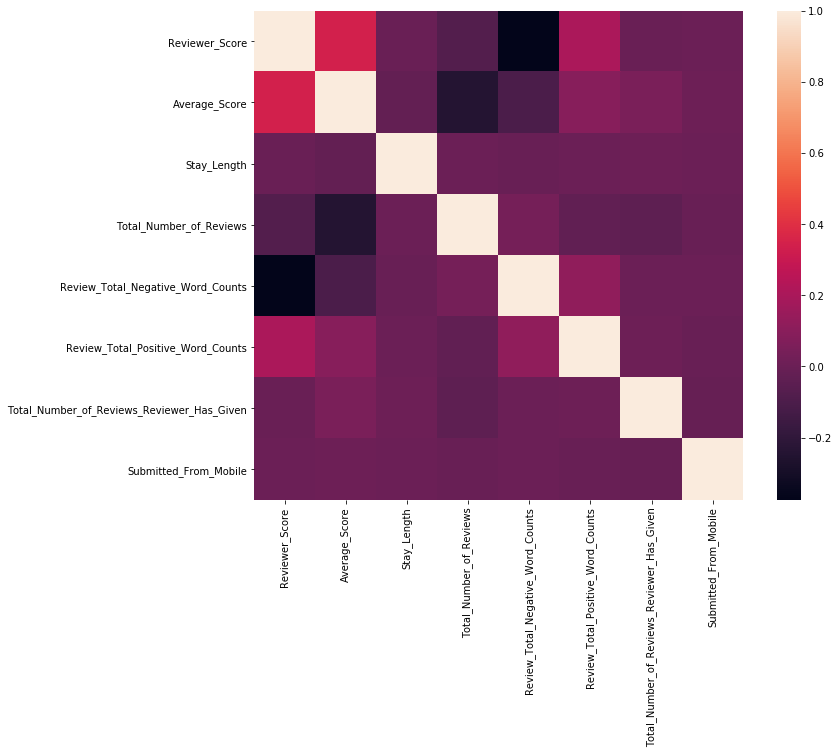

In [5]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square = True)

#Not the greatest, can use R's corrplot and explanation

#Mild correlations at best. The obvious ones are negative word count being negatively correlated with reviewer score, and positive word count being positively correlated.
#One interesting observation is that average score is negatively correlated with total number of reviews, suggesting that the greater number of reviews a hotel gets, the lower is its average rating. As such, we’d expect “less discovered/publicised” or more ‘niche’ hotels to be rated higher


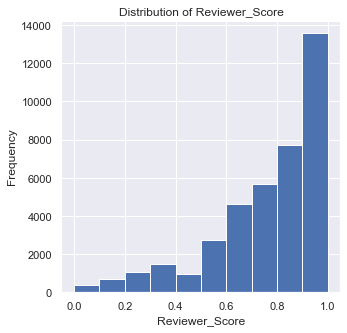

1.00    8385
0.95    5125
0.89    4288
0.84    3360
0.77    3118
0.67    2653
0.72    2540
0.61    1972
0.56    1499
0.51    1159
0.44     948
0.39     781
0.33     701
0.28     535
0.23     486
0.17     403
0.11     278
0.00     189
0.05     168
0.93      52
0.87      37
0.80      34
0.73      32
0.60      32
0.53      24
0.47      17
0.40      13
0.27      11
0.20       7
0.13       7
0.07       5
0.92       4
0.59       3
0.75       1
0.08       1
Name: Reviewer_Score, dtype: int64

In [6]:
#Exploring Review_Score
sns.set(rc = {'figure.figsize':(5,5)})
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(df['Reviewer_Score'], bins = 10)

plt.title('Distribution of Reviewer_Score')
plt.xlabel('Reviewer_Score')
plt.ylabel('Frequency')
plt.show()

#Can see it is lopsided to the right, doesn't follow normal distribution. A majority of the reviews are on the 'promoter' side

df['Reviewer_Score'].value_counts()
#We can see that very few values (triple digits) are below 1, whereas we have 5 figure values for scores 0.95 or above 

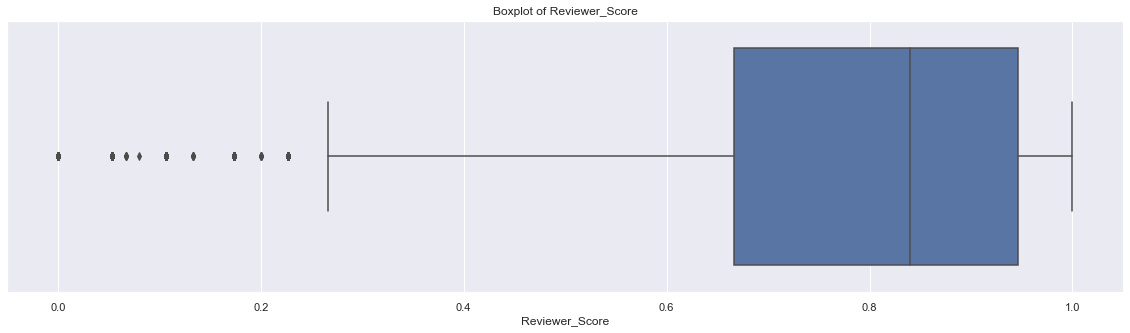

In [7]:
#Review Score boxplot

sns.set(rc = {'figure.figsize':(20,5)})
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sns.boxplot(df['Reviewer_Score'])

plt.title('Boxplot of Reviewer_Score')
plt.xlabel('Reviewer_Score')
plt.show()

#Boxplot shows the lower review scores as 'outliers' (9 of them specifically)

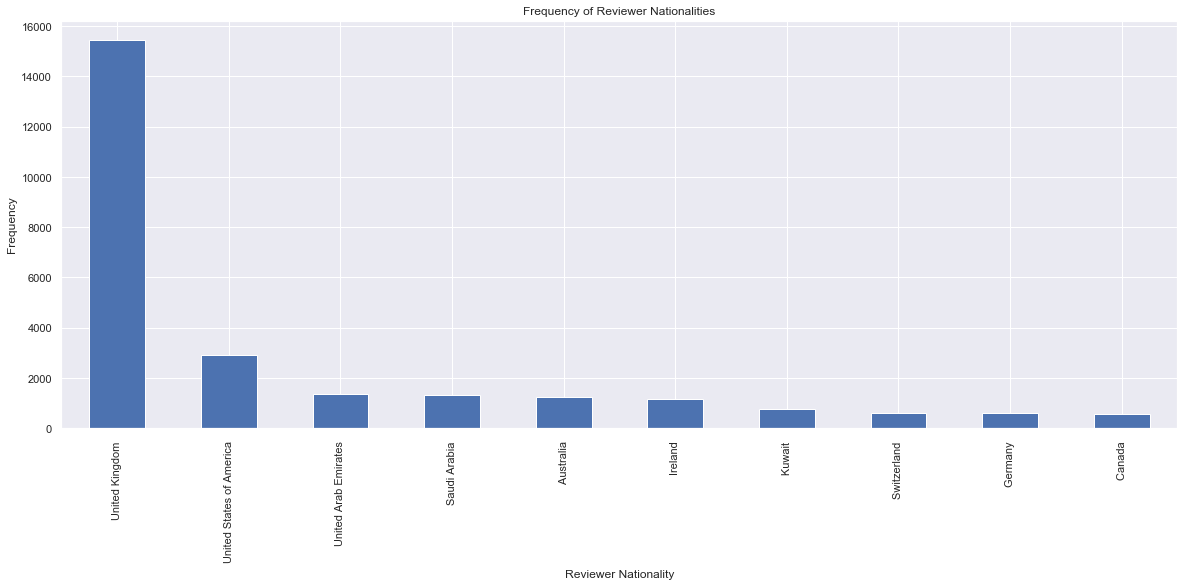

In [8]:
#Reviwer Nationality
sns.set(rc = {'figure.figsize':(20,7.5)})

df['Reviewer_Nationality'].value_counts()[0:].head(10).plot(kind = 'bar')

plt.title('Frequency of Reviewer Nationalities')
plt.xlabel('Reviewer Nationality')
plt.ylabel('Frequency')
plt.show()

#The vast majority of reviews come from UK travelers, followed by USA and UAE

#In the slicer, can set to [1:] to exclude UK travelers and get a more holistic picture

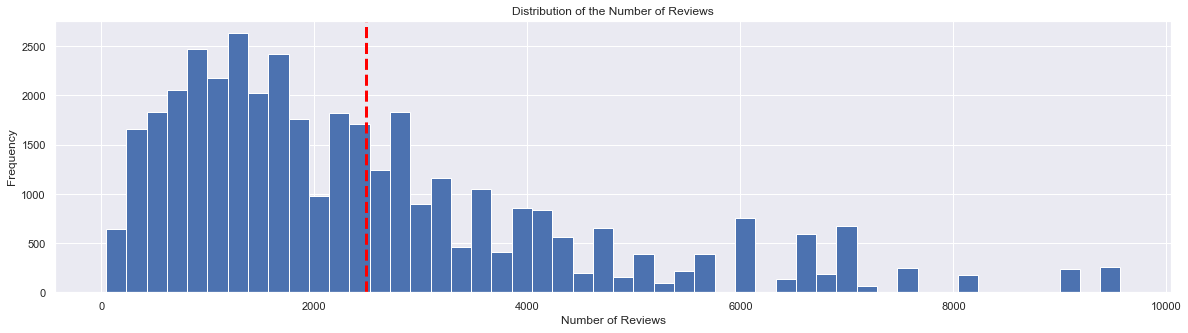

In [9]:
#Total_Number_of_Reviews - Histogram
sns.set(rc = {'figure.figsize':(20,5)})
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(df['Total_Number_of_Reviews'], bins = 50)
plt.axvline(df['Total_Number_of_Reviews'].mean(), color = 'red', linestyle = 'dashed', linewidth = 3)

plt.title('Distribution of the Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

#Hotels usually have an average of 2.5k reviews, with a large cluster having fewer than the mean amount
#We also note the presence of several outliers

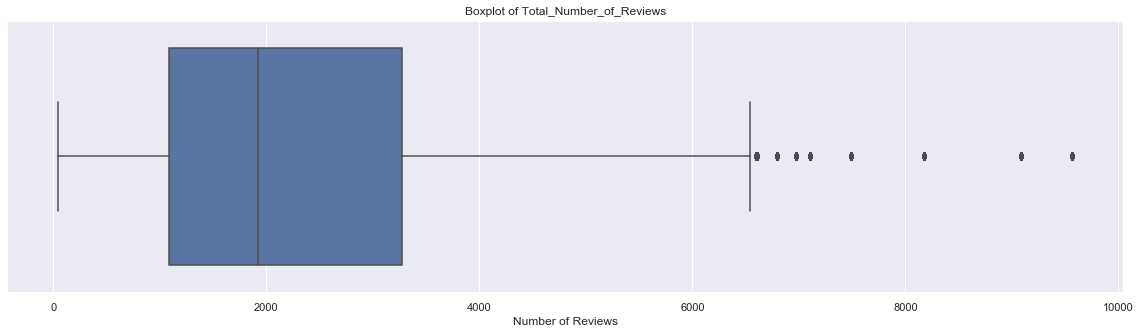

In [10]:
#Total_Number_of_Reviews - Boxplot

sns.set(rc = {'figure.figsize':(20,5)})
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sns.boxplot(df['Total_Number_of_Reviews'])

plt.title('Boxplot of Total_Number_of_Reviews')
plt.xlabel('Number of Reviews')
plt.show()

#We note the presence of 7 outliers; the median value is just sub-2k, and there's a respectable IQR

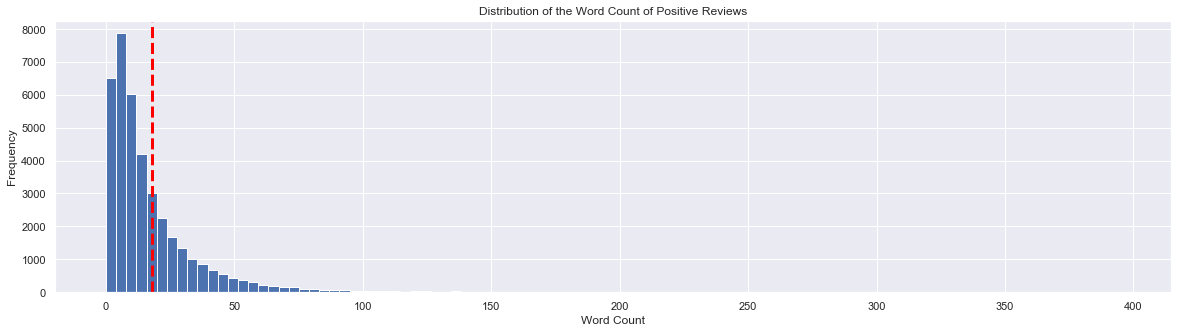

In [11]:
#Review_Total_Positive_Word_Counts - Histogram
sns.set(rc = {'figure.figsize':(20,5)})
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(df['Review_Total_Positive_Word_Counts'], bins = 100)
plt.axvline(df['Review_Total_Positive_Word_Counts'].mean(), color = 'red', linestyle = 'dashed', linewidth = 3)

plt.title('Distribution of the Word Count of Positive Reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

#We see a fairly downward trend, with the vast, vast majority of reviews being below 100 words, with an average of merely 17 words


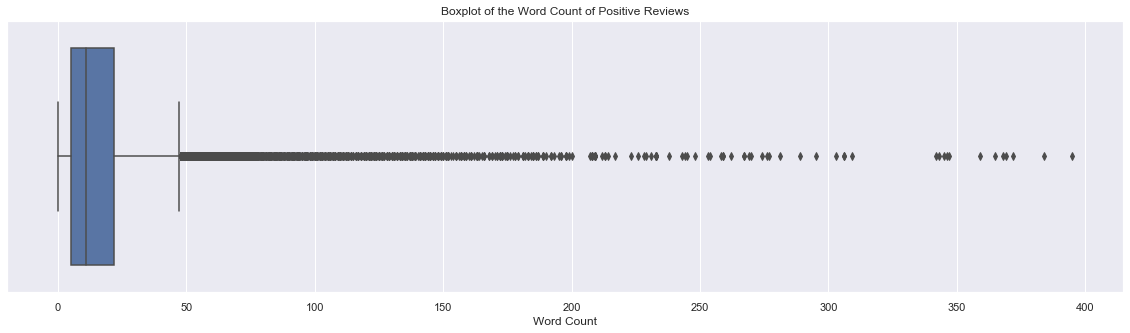

2870

In [12]:
#Review_Total_Positive_Word_Counts - Boxplot

sns.set(rc = {'figure.figsize':(20,5)})
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sns.boxplot(df['Review_Total_Positive_Word_Counts'])

plt.title('Boxplot of the Word Count of Positive Reviews')
plt.xlabel('Word Count')
plt.show()

#The boxplot shows the presence of a lot of outliers, and a very small IQR
#We can count the number of outliers 
df[df.Review_Total_Positive_Word_Counts > (df.Review_Total_Positive_Word_Counts.quantile(0.75) + 1.5*np.subtract(*np.percentile(df.Review_Total_Positive_Word_Counts, [75, 25])))].shape[0]
#There are 2870 outliers, all on the 'positive' side

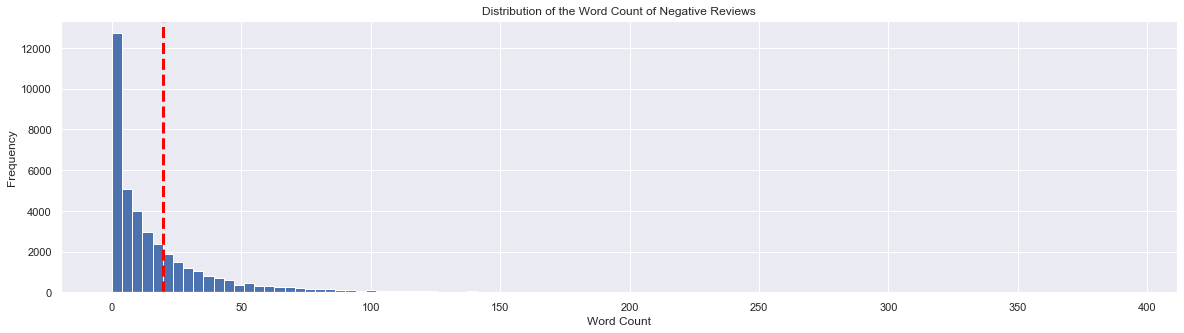

In [13]:
#Review_Total_Negative_Word_Counts - Histogram
sns.set(rc = {'figure.figsize':(20,5)})
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(df['Review_Total_Negative_Word_Counts'], bins = 100)
plt.axvline(df['Review_Total_Negative_Word_Counts'].mean(), color = 'red', linestyle = 'dashed', linewidth = 3)

plt.title('Distribution of the Word Count of Negative Reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

#The trend here is fairly downwards as well, except the drop is steeper

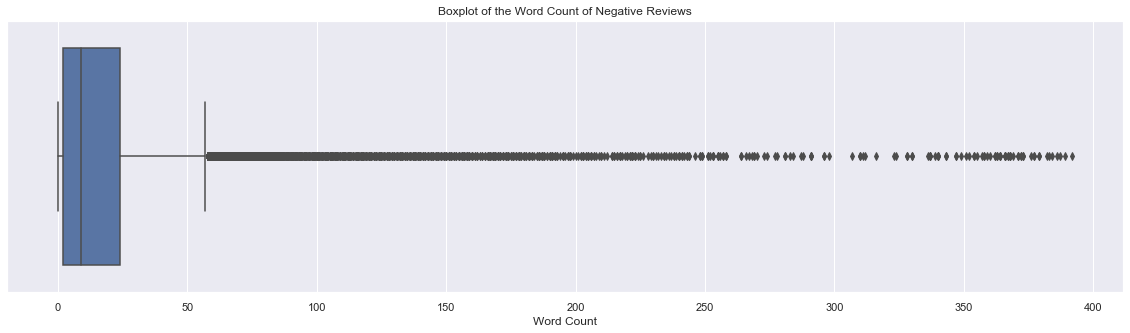

2984

In [14]:
#Review_Total_Negative_Word_Counts - Boxplot

sns.set(rc = {'figure.figsize':(20,5)})
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sns.boxplot(df['Review_Total_Negative_Word_Counts'])

plt.title('Boxplot of the Word Count of Negative Reviews')
plt.xlabel('Word Count')
plt.show()

#The boxplot shows the presence of a lot of outliers, and a very small IQR
#We can count the number of outliers 
df[df.Review_Total_Negative_Word_Counts > (df.Review_Total_Negative_Word_Counts.quantile(0.75) + 1.5*np.subtract(*np.percentile(df.Review_Total_Negative_Word_Counts, [75, 25])))].shape[0]
#There are 2984 outliers, again all on the 'positive' side
#This shows the similarlity between positive and negative reviews, at least from a wordcount sense 

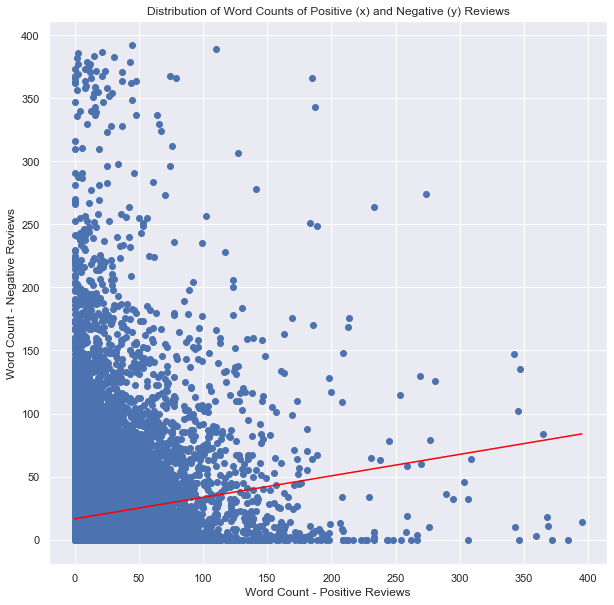

In [15]:
#Scatterplot of Positive & Negative Reviews

sns.set(rc = {'figure.figsize':(10,10)})
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(df['Review_Total_Positive_Word_Counts'], df['Review_Total_Negative_Word_Counts'])
plt.plot(np.unique(df['Review_Total_Positive_Word_Counts']), np.poly1d(np.polyfit(df['Review_Total_Positive_Word_Counts'], df['Review_Total_Negative_Word_Counts'], 1))(np.unique(df['Review_Total_Positive_Word_Counts'])), color = 'red')

plt.title('Distribution of Word Counts of Positive (x) and Negative (y) Reviews')
plt.xlabel('Word Count - Positive Reviews')
plt.ylabel('Word Count - Negative Reviews')
plt.show()

#Can draw any insights from this?

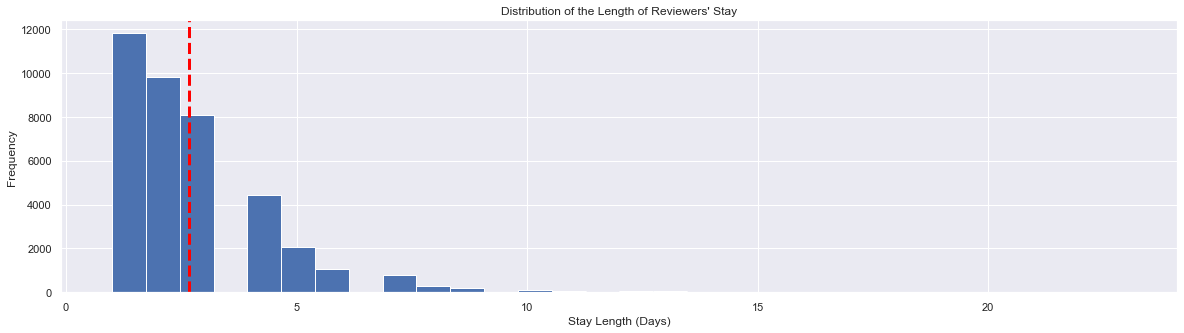

In [16]:
#Stay_Length - Histogram
sns.set(rc = {'figure.figsize':(20,5)})
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(df['Stay_Length'], bins = 30)
plt.axvline(df['Stay_Length'].mean(), color = 'red', linestyle = 'dashed', linewidth = 3)

plt.title("""Distribution of the Length of Reviewers' Stay""")
plt.xlabel('Stay Length (Days)')
plt.ylabel('Frequency')
plt.show()

#We see a steadily decreasing trend as we move rightwards, with a mean of just a little over 2 days

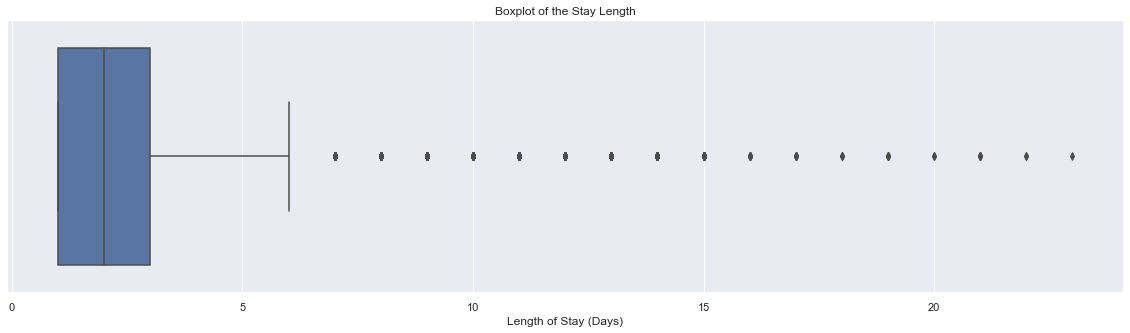

1607

In [17]:
#Stay_Length - Boxplot

sns.set(rc = {'figure.figsize':(20,5)})
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sns.boxplot(df['Stay_Length'])

plt.title('Boxplot of the Stay Length')
plt.xlabel('Length of Stay (Days)')
plt.show()

#The boxplot shows the presence of a lot of outliers, and a very small IQR
#We can count the number of outliers 
df[df.Stay_Length > (df.Stay_Length.quantile(0.75) + 1.5*np.subtract(*np.percentile(df.Stay_Length, [75, 25])))].shape[0]
#There are 1607 outliers, again all on the 'positive' side
#This shows that most families go on 'short' vacations, with only a small proportion staying for a week or longer 

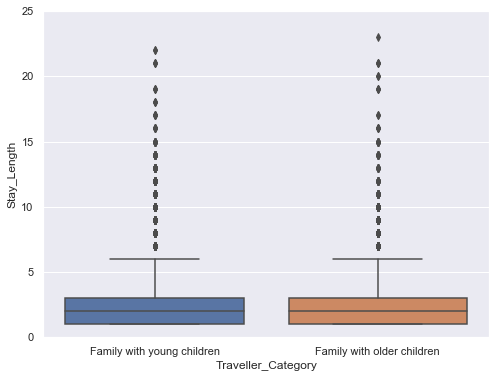

In [18]:
#Barplot of Stay Length depending on whether the family has older or younger children

sns.set(rc = {'figure.figsize':(15,15)})
var = 'Traveller_Category'
data = pd.concat([df['Stay_Length'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Stay_Length", data=data)
fig.axis(ymin = 0, ymax = 25);

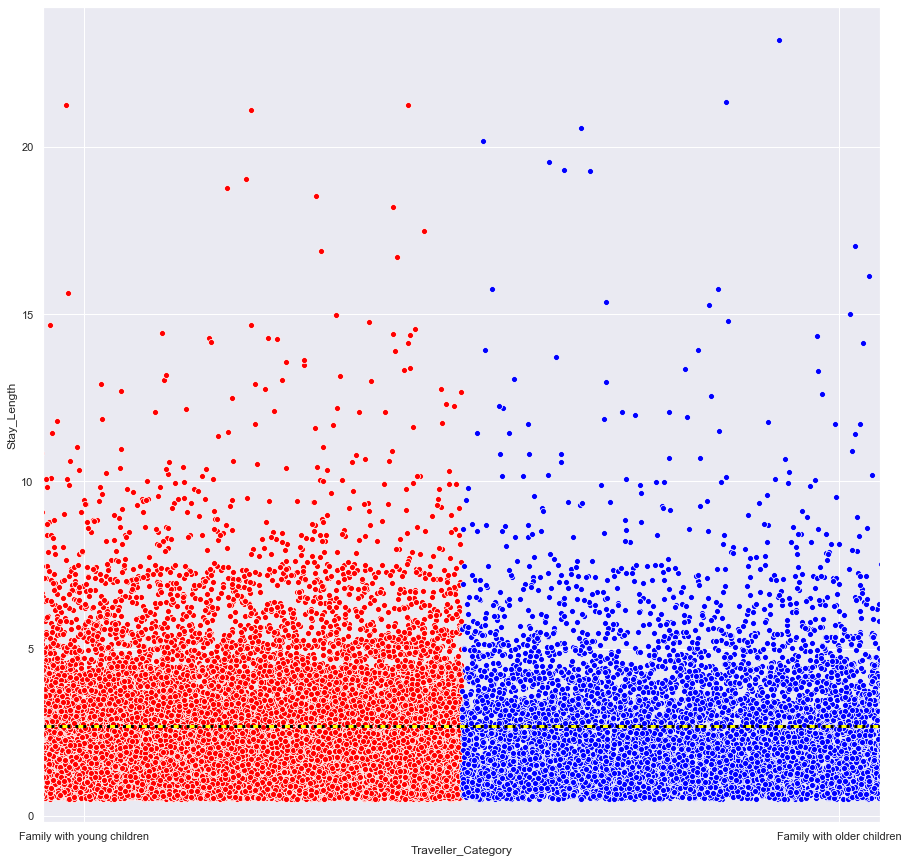

In [19]:
def jitter_dots(dots):
    offsets = dots.get_offsets()
    jittered_offsets = offsets
    jittered_offsets[:, 0] += np.random.uniform(-0.5, 0.5, offsets.shape[0]) # x
    jittered_offsets[:, 1] += np.random.uniform(-0.5, 0.5, offsets.shape[0]) # y
    dots.set_offsets(jittered_offsets)

df1 = df[df.Traveller_Category == 'Family with young children']
plt.axhline(df1['Stay_Length'].mean(), color = 'yellow', linestyle = 'dashed', linewidth = 3)
df2 = df[df.Traveller_Category == 'Family with older children']   
plt.axhline(df2['Stay_Length'].mean(), color = 'black', linestyle = 'dotted', linewidth = 3)
    
ax = sns.scatterplot(data = df1, x = 'Traveller_Category', y = 'Stay_Length', color = 'red')
ax = sns.scatterplot(data = df2, x = 'Traveller_Category', y = 'Stay_Length', color = 'blue')
jitter_dots(ax.collections[0])
jitter_dots(ax.collections[1])

#Average stay duration is nearly indistinguishable between families with younger/older children. They have the same mean, median, 1st quartile and 3rd quartile values stay

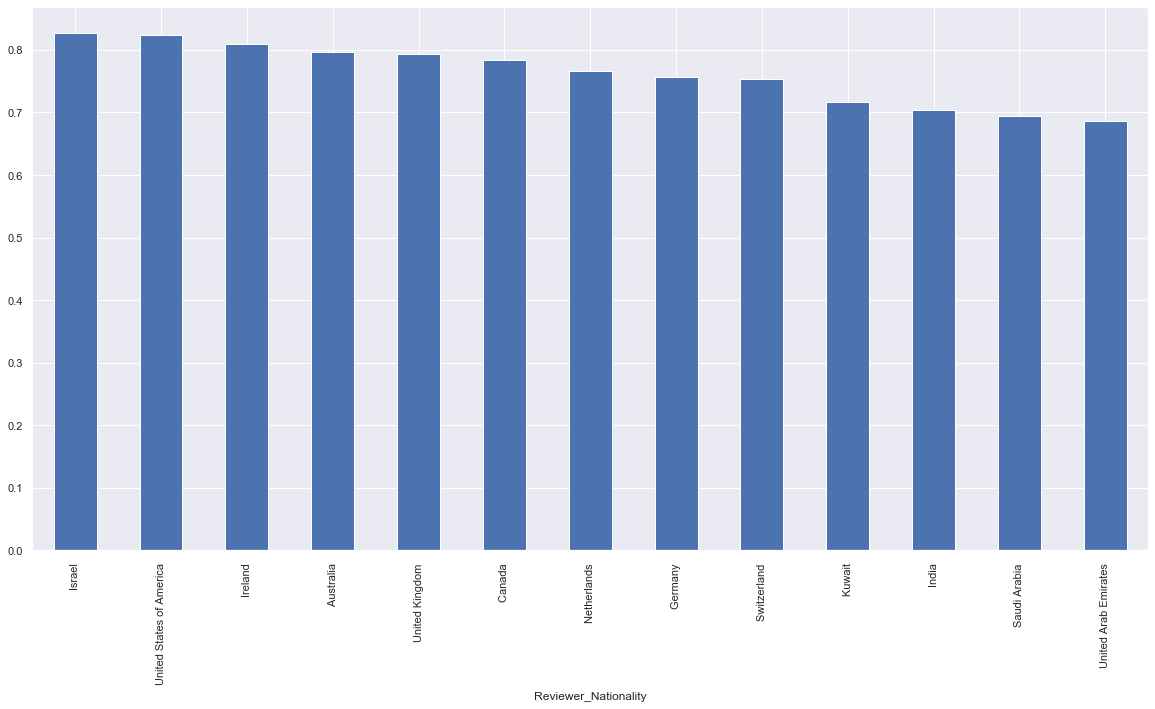

In [20]:
#===============================================================================================================================
#Bivariate exploration now

#Reviewer_Score by Reviewer_Nationality

#Getting nationalities with greater than 500 reviews
sns.set(rc = {'figure.figsize':(20,10)})
df1 = df[df['Reviewer_Nationality'].map(df['Reviewer_Nationality'].value_counts()) > 500]
df1.groupby('Reviewer_Nationality').mean()['Reviewer_Score'].sort_values(ascending = False).plot(kind = 'bar')

#The nationalities with most reviews usually rated their hotels reasonably highly; a few nationalities were promoters, while most were passives


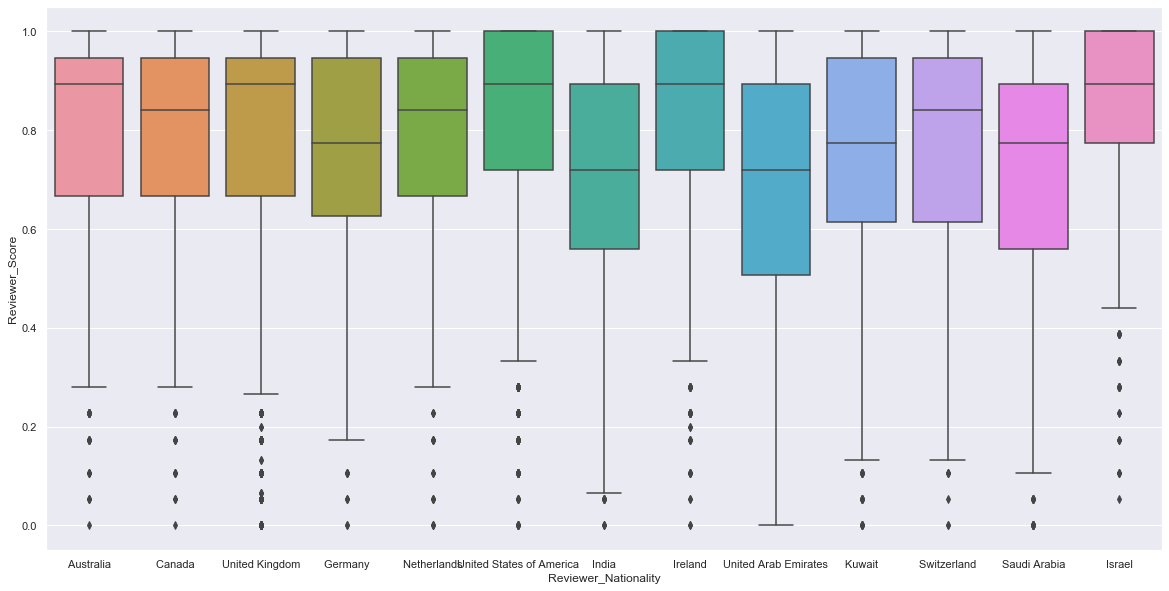

In [21]:
#Boxplot of Reviewer_Score with Nationality (Doing once more for the most represented nationalities)
sns.set(rc = {'figure.figsize':(20,10)})
sns.boxplot(data = df1, x = 'Reviewer_Nationality', y = 'Reviewer_Score')

#We can clearly see that while the median values are fairly comparable, there's significant variability in the overall distributions of reviewer_score by nationality
#The UAE has the widest range, as well as the largest IQR
#Israel has the shortest IQR, but also hasa very large number of outliers
#India and UAE share the value of the lowest median score

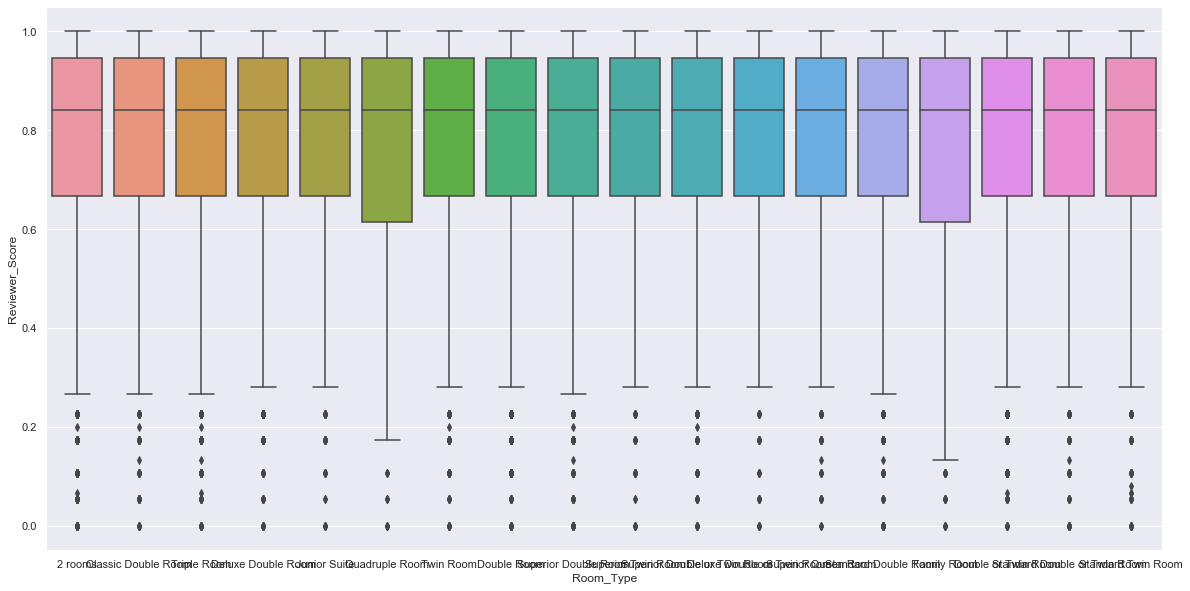

In [22]:
#Boxplot of Reviewer_Score with Room_Type
sns.set(rc = {'figure.figsize':(20,10)})
sns.boxplot(data = df, x = 'Room_Type', y = 'Reviewer_Score')

#We can see that there's minimal difference among the median values for the different room_types
#Natually, some rooms have more outliers than others, but the distributions for the reviwer_score are nearly identical for the different room types


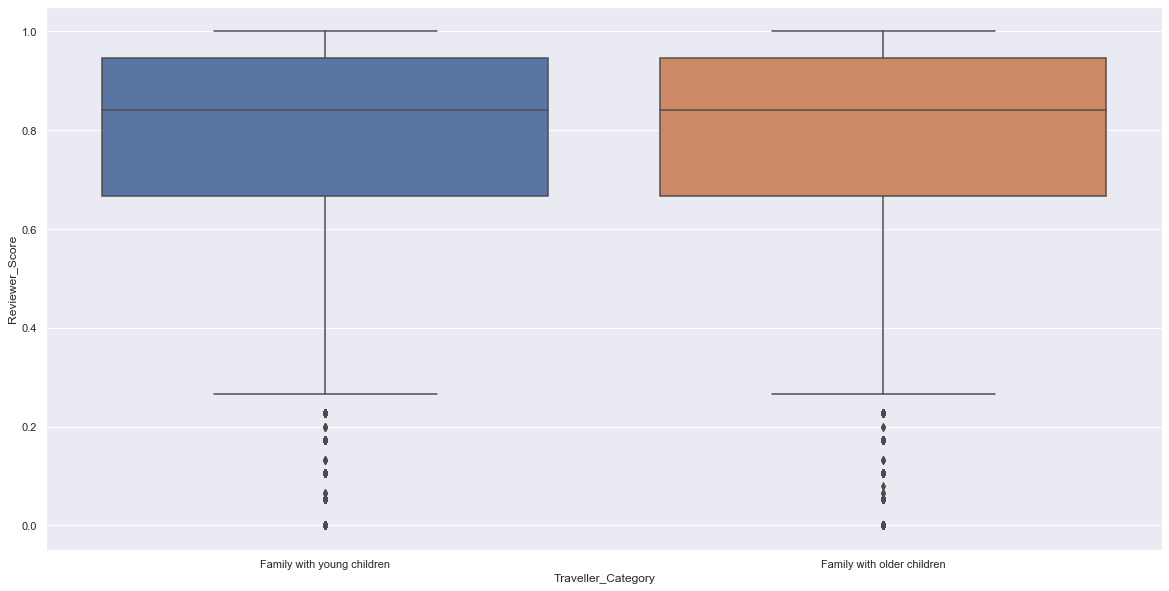

In [23]:
#Boxplot of Reviewer_Score with Room_Type
sns.set(rc = {'figure.figsize':(20,10)})
sns.boxplot(data = df, x = 'Traveller_Category', y = 'Reviewer_Score')

#We can see that there's minimal difference between the scores across families with younger/older children

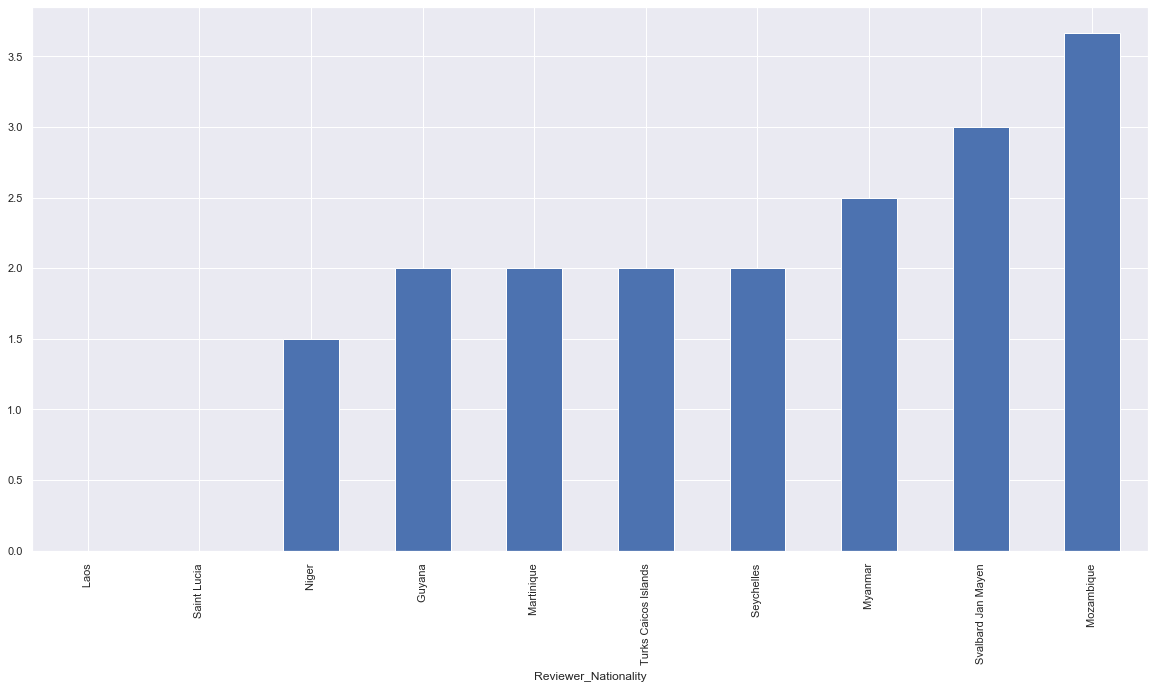

In [24]:
#Review_Total_Positive_Word_Counts by Reviewer_Nationality

#df.groupby('Reviewer_Nationality').mean()['Review_Total_Positive_Word_Counts'].sort_values(ascending = False).head(10).plot(kind = 'bar')

#We can see that reviwers from the Bahamas tend to have the most to praise about their stays, with Andorra, Belarus following
#One interesting observation is that non-European nationals usually have higher word counts in their positive reviews (Especially Carribean nationals)

df.groupby('Reviewer_Nationality').mean()['Review_Total_Positive_Word_Counts'].sort_values(ascending = True).head(10).plot(kind = 'bar')
#The lowest counts in the positive reviews are offered by Niger, Guyana, and Martinique (Excluded Laos and St. Lucia as they had 0 word count)

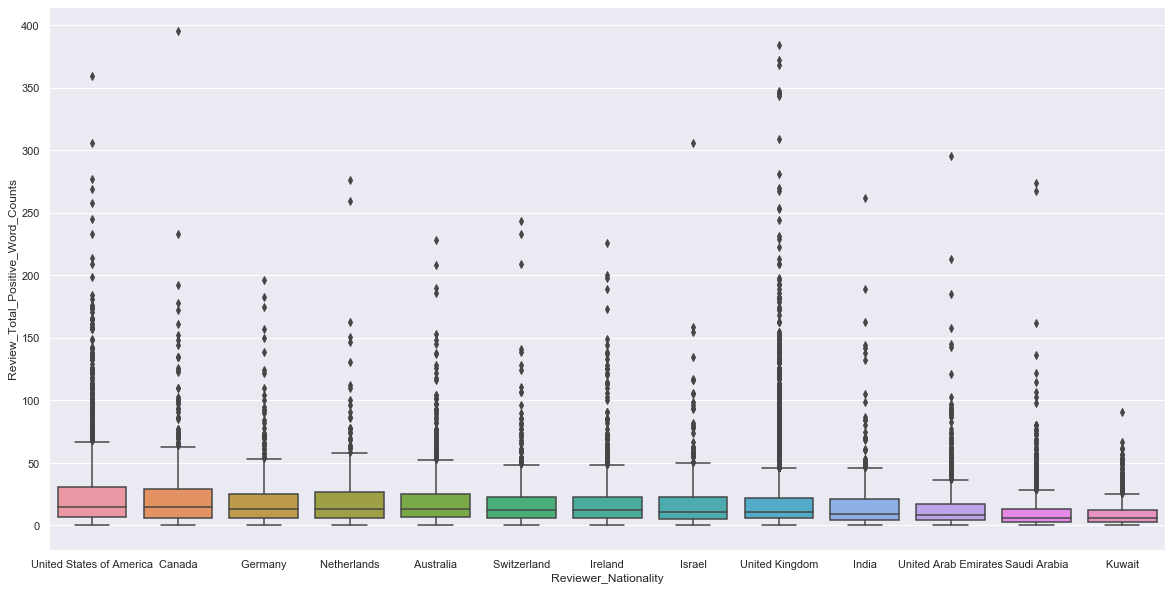

In [25]:
#Boxplot - Positive words by Reviewer_Nationality
sns.set(rc = {'figure.figsize':(20,10)})

sorted_index = df1.groupby('Reviewer_Nationality').mean()['Review_Total_Positive_Word_Counts'].sort_values(ascending = False).index

sns.boxplot(data = df1, x = 'Reviewer_Nationality', y = 'Review_Total_Positive_Word_Counts', order = sorted_index)
#We can see that of the most reviewing nations, Americans and Canadians have the highest median positive word count for reviews, whereas Kuwaitians and Saudi Arabians have the least
#Here too, it is interesting to note than non-Europeans have the most to say

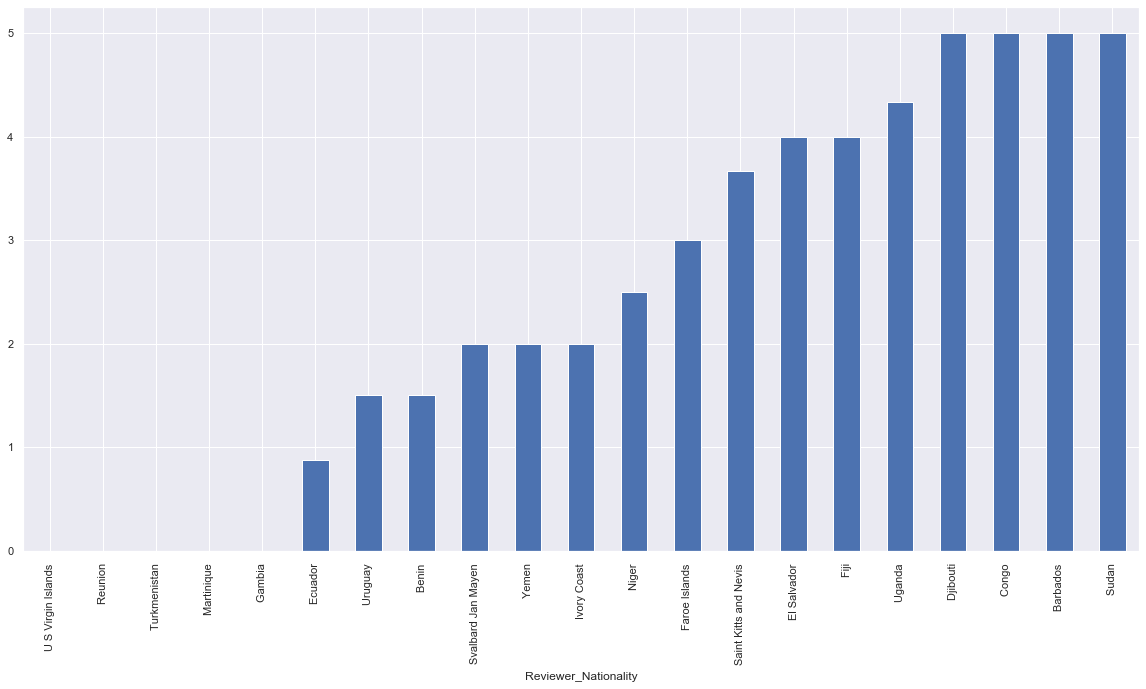

In [26]:
#Review_Total_Negative_Word_Counts by Reviewer_Nationality

#df.groupby('Reviewer_Nationality').mean()['Review_Total_Negative_Word_Counts'].sort_values(ascending = False).head(10).plot(kind = 'bar')

#We can see that reviwers from St. Marten and the Turks & Caicos Island usually have an average of 150+ words in their negative reviews, whereas those from Libya and Burundi have an average of 50-75 words

df.groupby('Reviewer_Nationality').mean()['Review_Total_Negative_Word_Counts'].sort_values(ascending = True).head(21).plot(kind = 'bar')
#The lowest counts in the negative reviews are offered by Ecuador, Uruguay and Benin. As many as 16 countries had an average of 5 or less negative words per review (Excluding those with 0 word count)!

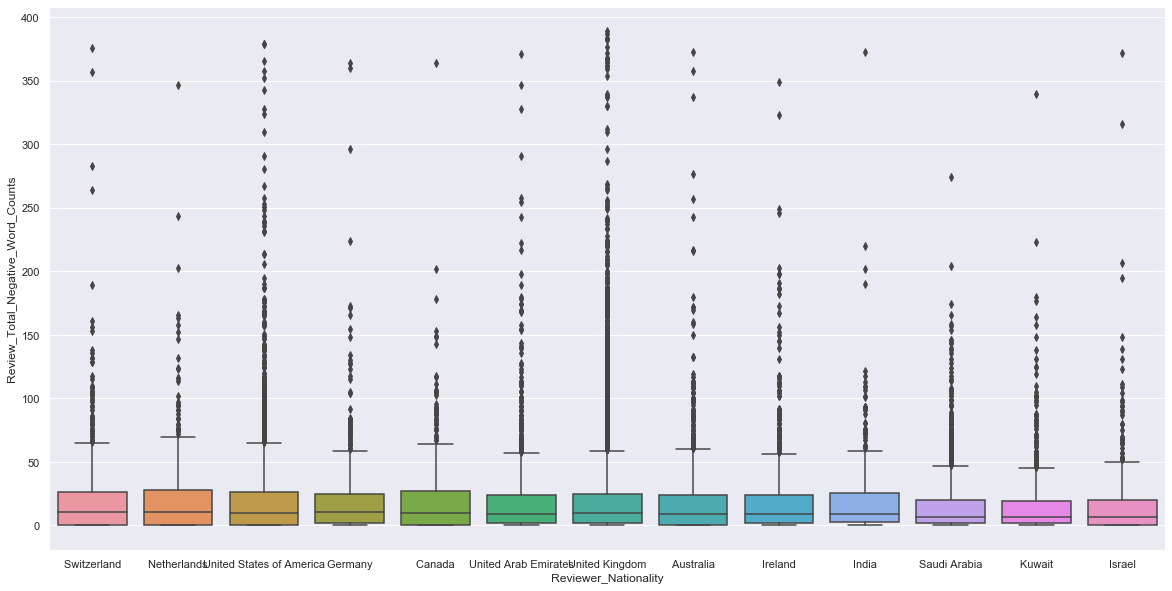

In [27]:
#Boxplot - Negative words by Reviewer_Nationality
sns.set(rc = {'figure.figsize':(20,10)})

sorted_index1 = df1.groupby('Reviewer_Nationality').mean()['Review_Total_Negative_Word_Counts'].sort_values(ascending = False).index

sns.boxplot(data = df1, x = 'Reviewer_Nationality', y = 'Review_Total_Negative_Word_Counts', order = sorted_index1)
#Switzerland, Netherlands, USA, Germany and Canada comprise the top 5 here too. This shows that these nationalities are generous with praise, but also don't shy away from letting their feelings be known when their experience is sub-par

In [28]:
df = pd.read_csv("df_final.csv")

df.isna().sum()

df = df.dropna(axis = 0, how = 'any')

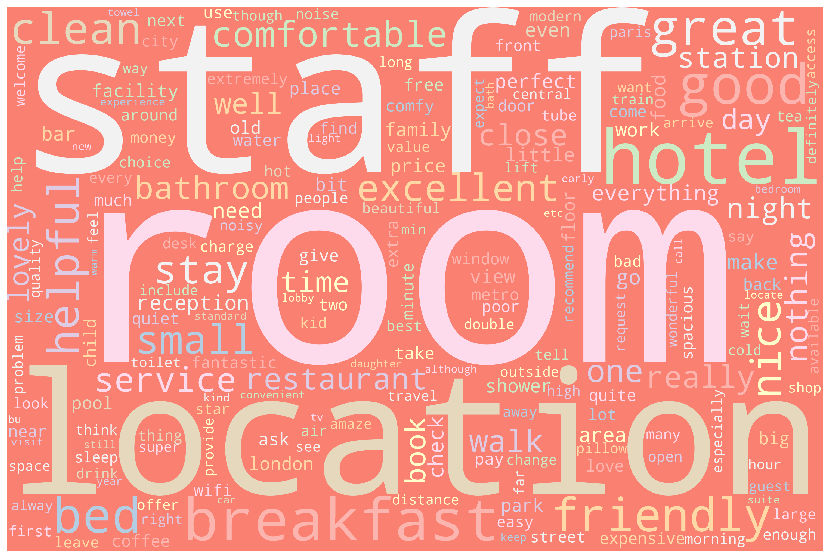

In [29]:
from wordcloud import WordCloud

wordcloud1 = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(' '.join(df['Review_Clean']))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

wordcloud1.to_file('wordcloud_salmon.png')

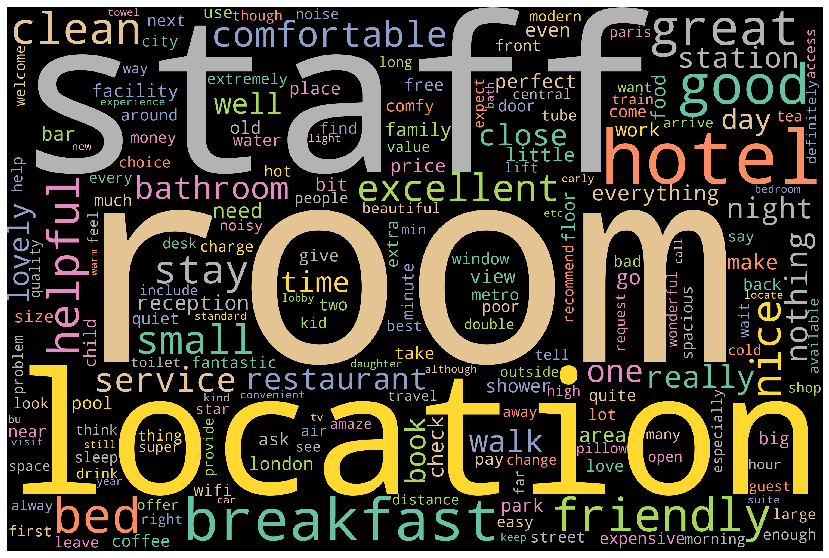

In [30]:
wordcloud2 = WordCloud(width = 3000, height = 2000, random_state = 1, background_color = 'black', colormap = 'Set2', collocations = False).generate(' '.join(df['Review_Clean']))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

wordcloud2.to_file('wordcloud_black.png')

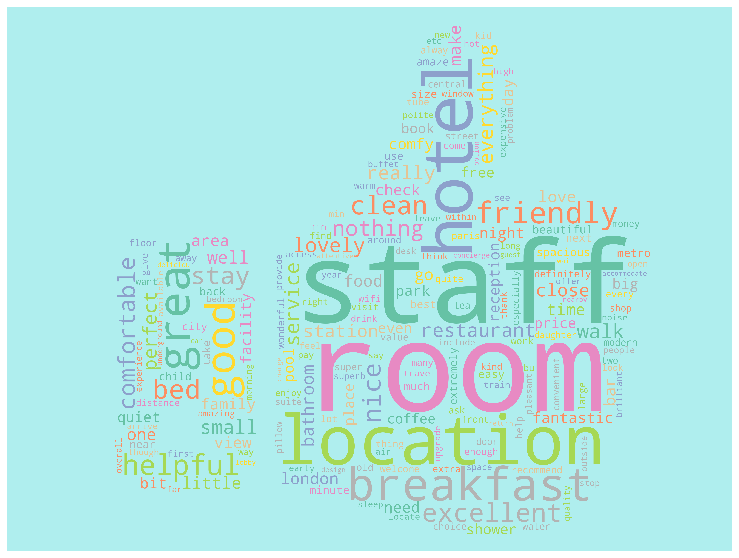

In [31]:
#Creating a wordcloud for promotors' reviews
from PIL import Image
mask = np.array(Image.open('upvote.png'))

df_p = df[df.Reviewer_Score_Cat == 'promoter']

wordcloud3 = WordCloud(width = 3000, height = 2000, random_state = 1, background_color = 'paleturquoise', colormap = 'Set2', collocations = False, mask = mask).generate(' '.join(df_p['Review_Clean']))
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

wordcloud3.to_file('wordcloud_promoter.png')

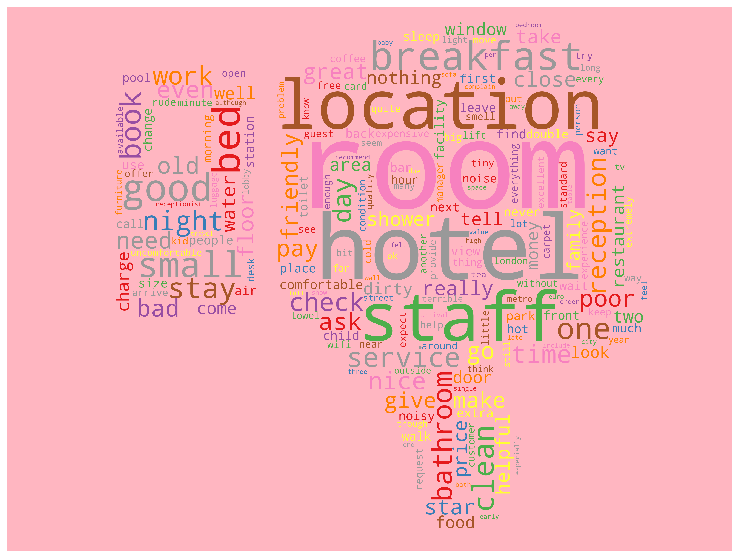

In [32]:
#Creating a wordcloud for detractors' reviews
from PIL import Image
mask = np.array(Image.open('downvote.png'))

df_d = df[df.Reviewer_Score_Cat == 'detractor']

wordcloud4 = WordCloud(width = 3000, height = 2000, random_state = 1, background_color = 'lightpink', colormap = 'Set1', collocations = False, mask = mask).generate(' '.join(df_d['Review_Clean']))
plt.imshow(wordcloud4)
plt.axis("off")
plt.show()

wordcloud4.to_file('wordcloud_detractor.png')

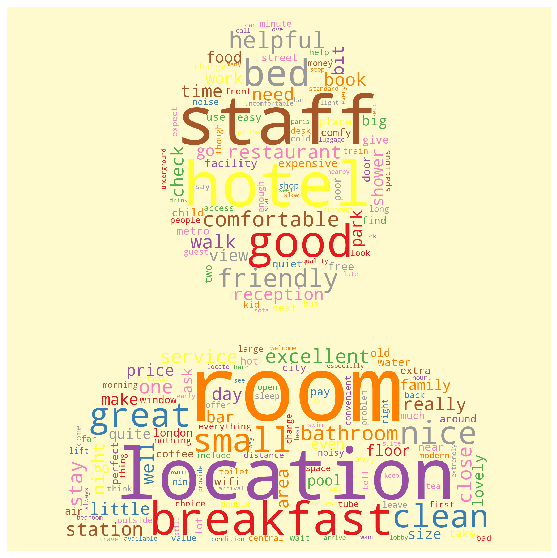

In [33]:
#Creating a wordcloud for passives' reviews
from PIL import Image
mask = np.array(Image.open('user.png'))

df_pa = df[df.Reviewer_Score_Cat == 'passive']

wordcloud5 = WordCloud(width = 3000, height = 2000, random_state = 1, background_color = 'lemonchiffon', colormap = 'Set1', collocations = False, mask = mask).generate(' '.join(df_pa['Review_Clean']))
plt.imshow(wordcloud5)
plt.axis("off")
plt.show()

wordcloud5.to_file('wordcloud_passive.png')

In [34]:
rev = df[['Review', 'Review_Clean', 'Reviewer_Score_Cat']]

In [35]:
rev1 = rev.loc[0:2985,]
rev2 = rev.loc[2987:,]
frames = [rev1, rev2]

rev = pd.concat(frames)
rev = rev.reset_index()

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

#Classifying reviews into sentiment polarities
rev['neg'] = rev['Review_Clean'].apply(lambda x:sia.polarity_scores(x)['neg'])
rev['neu'] = rev['Review_Clean'].apply(lambda x:sia.polarity_scores(x)['neu'])
rev['pos'] = rev['Review_Clean'].apply(lambda x:sia.polarity_scores(x)['pos'])
rev['compound'] = rev['Review_Clean'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [37]:
pos_review = [ j for i, j in enumerate(rev['Review_Clean']) if rev['compound'][i] > 0.2]
neg_review = [ j for i, j in enumerate(rev['Review_Clean']) if rev['compound'][i] < -0.2]
neu_review = [ j for i, j in enumerate(rev['Review_Clean']) if rev['compound'][i] >= -0.2]

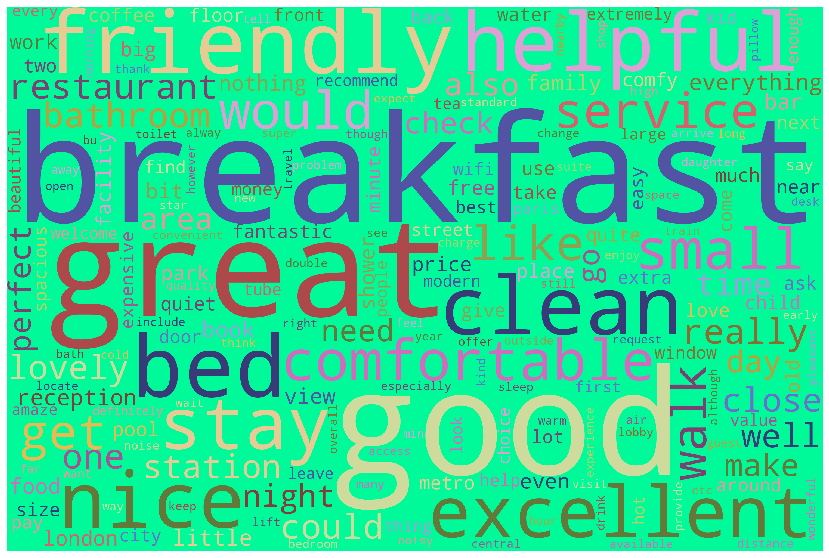

In [38]:
common_words_to_exclude = ['staff', 'room', 'location', 'hotel']

wordcloud6 = WordCloud(width = 3000, height = 2000, random_state = 1, background_color = 'mediumspringgreen', colormap = 'tab20b', collocations = False, stopwords = common_words_to_exclude).generate(' '.join(pos_review))
plt.imshow(wordcloud6)
plt.axis("off")
plt.show()

wordcloud6.to_file('wordcloud_pos.png')

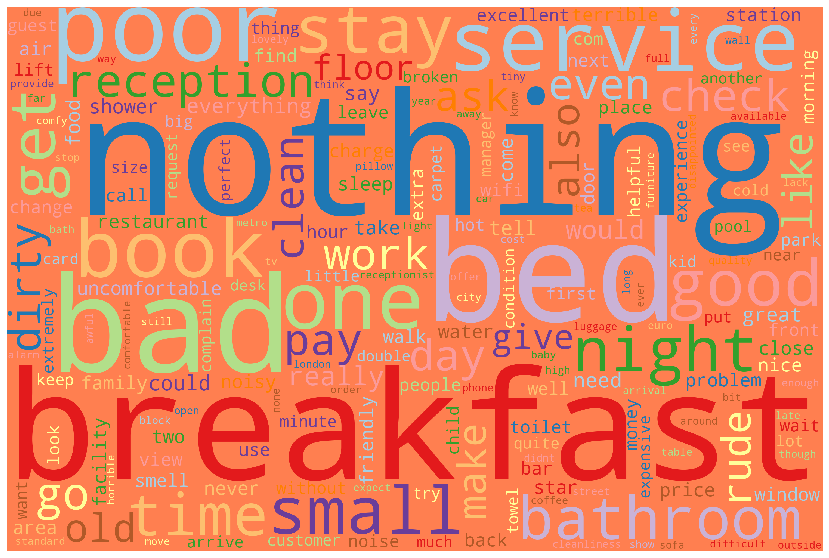

In [39]:
common_words_to_exclude = ['staff', 'room', 'location', 'hotel']

wordcloud7 = WordCloud(width = 3000, height = 2000, random_state = 1, background_color = 'coral', colormap = 'Paired', collocations = False, stopwords = common_words_to_exclude).generate(' '.join(neg_review))
plt.imshow(wordcloud7)
plt.axis("off")
plt.show()

wordcloud7.to_file('wordcloud_pos.png')

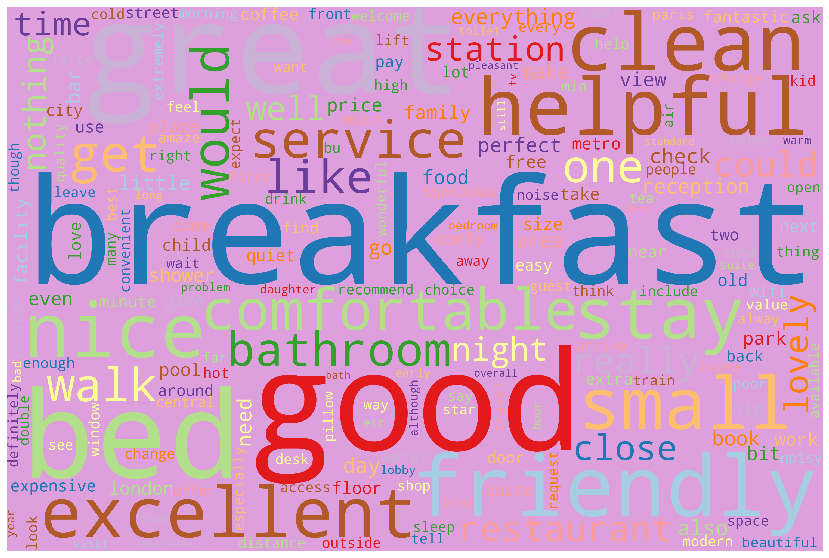

In [40]:
common_words_to_exclude = ['staff', 'room', 'location', 'hotel']

wordcloud8 = WordCloud(width = 3000, height = 2000, random_state = 1, background_color = 'plum', colormap = 'Paired', collocations = False, stopwords = common_words_to_exclude).generate(' '.join(neu_review))
plt.imshow(wordcloud8)
plt.axis("off")
plt.show()

wordcloud8.to_file('wordcloud_pos.png')

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['Review_Clean'], 20)

#for word, freq in common_words:
 #   print(word, freq)

a = pd.DataFrame(common_words, columns = ['Review_Clean' , 'count'])

a.groupby('Review_Clean').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title = 'Top 20 unigrams')

NameError: name 'df' is not defined

In [42]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df['Review_Clean'], 20)

#for word, freq in common_words:
 #   print(word, freq)

b = pd.DataFrame(common_words, columns = ['Review_Clean' , 'count'])

b.groupby('Review_Clean').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams')

In [43]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_trigram(df['Review_Clean'], 20)

#for word, freq in common_words:
 #   print(word, freq)

c = pd.DataFrame(common_words, columns = ['Review_Clean' , 'count'])

c.groupby('Review_Clean').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams')

In [46]:
#Positive Sentiments n-grams

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(pos_review, 20)

#for word, freq in common_words:
 #   print(word, freq)

a1 = pd.DataFrame(common_words, columns = ['Positive_Review' , 'count'])

a1.groupby('Positive_Review').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title = 'Top 20 unigrams for Positive Reviews')

#Pretty much the same as wordcloud, so not greatly helpful

In [47]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(pos_review, 20)

#for word, freq in common_words:
 #   print(word, freq)

a2 = pd.DataFrame(common_words, columns = ['Positive_Review' , 'count'])

a2.groupby('Positive_Review').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams for Positive Reviews')

In [49]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(pos_review, 20)

#for word, freq in common_words:
 #   print(word, freq)

a3 = pd.DataFrame(common_words, columns = ['Positive_Review' , 'count'])

a3.groupby('Positive_Review').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams for Positive Reviews')

In [51]:
#Negative Sentiments n-grams

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(neg_review, 20)

#for word, freq in common_words:
 #   print(word, freq)

b1 = pd.DataFrame(common_words, columns = ['Negative_Review' , 'count'])

b1.groupby('Negative_Review').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title = 'Top 20 unigrams for Negative Reviews')

#Pretty much the same as wordcloud, so not greatly helpful

In [52]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(neg_review, 20)

#for word, freq in common_words:
 #   print(word, freq)

a2 = pd.DataFrame(common_words, columns = ['Negative_Review' , 'count'])

a2.groupby('Negative_Review').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams for Negative Reviews')

In [53]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(neg_review, 20)

#for word, freq in common_words:
 #   print(word, freq)

a3 = pd.DataFrame(common_words, columns = ['Negative_Review' , 'count'])

a3.groupby('Negative_Review').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams for Negative Reviews')